In [8]:
import pandas as pd

columns = ['id','title','date','ip']

data = pd.read_csv('wiki_edit.txt',sep = ' ',names = columns)

data.head()

,id,title,date,ip
0,9019643,Anarchism,2005-01-01,ip:24.136.172.37
1,9062018,Anarchism,2005-01-03,ip:137.53.22.23
2,9085524,Anarchism,2005-01-03,ip:24.42.90.254
3,9140836,Anarchism,2005-01-06,ip:69.61.184.201
4,9160986,A,2005-01-06,Fvw


In [30]:
use = data.groupby(['title'])['title'].value_counts().to_frame().reset_index()

In [34]:
# I was unable to get this portion done, I wrote a psuedo code to 
# show my understanding

stream = use[0:1000]

d = {}
k = x

result = []
for i in stream:
    if i in d:
        d{i,+1}
    else if length(d) < k - 1:
        d{i,1}.add
    else:
        for key,value in d:
            value - 1
            if value = 0:
                d{key,value}.drop

            
for key,value in d:
    (key,value).append




,title,count
0,%s_(printf),1
1,&c._(weblog),1
2,'N_Sync,1
3,(29075)_1950_DA,1
4,-phob-,1
...,...,...
21290,Ōtsuchi,1
21291,"Ōuchiyama,_Mie",1
21292,Żabbar,1
21293,Žarko_Dolinar,1


In [88]:
aapl = pd.read_csv('aapl.csv')
bac = pd.read_csv('bac.csv')
c = pd.read_csv('c.csv')
f = pd.read_csv('f.csv')
goog = pd.read_csv('goog.csv')
hmc = pd.read_csv('hmc.csv')
msft = pd.read_csv('msft.csv')
tym = pd.read_csv('tym.csv')
wfc = pd.read_csv('wfc.csv')

stocks = ['aapl','bac','c','f','goog','hmc','msft','tym','wfc']

In [90]:
aapl['lag'] = aapl['Close'].shift(1)

aapl['change'] = aapl['lag'] - aapl['Close']


bac['lag'] = bac['Close'].shift(1)

bac['change'] = bac['lag'] - bac['Close']


c['lag'] = c['Close'].shift(1)

c['change'] = c['lag'] - c['Close']


f['lag'] = f['Close'].shift(1)

f['change'] = f['lag'] - f['Close']


goog['lag'] = goog['Close'].shift(1)

goog['change'] = goog['lag'] - goog['Close']


hmc['lag'] = hmc['Close'].shift(1)

hmc['change'] = hmc['lag'] - hmc['Close']


msft['lag'] = msft['Close'].shift(1)

msft['change'] = msft['lag'] - msft['Close']


tym['lag'] = tym['Close'].shift(1)

tym['change'] = tym['lag'] - tym['Close']


wfc['lag'] = wfc['Close'].shift(1)

wfc['change'] = wfc['lag'] - wfc['Close']


In [151]:
import numpy as np

newdata = pd.DataFrame()

newdata['aapl'],newdata['bac'],newdata['c'],newdata['f'],newdata['goog'],newdata['hmc'],newdata['msft'],newdata['tym'],newdata['wfc'], = aapl['change'],bac['change'],c['change'],f['change'],goog['change'],hmc['change'],msft['change'],tym['change'],wfc['change']

newdata = newdata.drop(index=0)

corrmat = newdata.corr(method = 'pearson')

#corrmat[['bac','c','wfc']]

need = corrmat.loc[['bac','c','wfc'],['bac','c','wfc']]

m = np.triu(np.ones_like(need))

np.nansum(need.where(m == 0).to_numpy())/3



0.5315427172318341

In [147]:
need = corrmat.loc[['bac','c','wfc'],['aapl','msft','goog']]

m = np.triu(np.ones_like(need))

(need.values.sum())/9

# they have a higher average coorelation within group


0.2235056749582714

In [153]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalcomponents = pca.fit_transform(newdata)

In [154]:
principaldf = pd.DataFrame(data = principalcomponents, columns = ['pca1', 'pca2','pca3'])

Text(0.5, 1.0, '3rd PC')

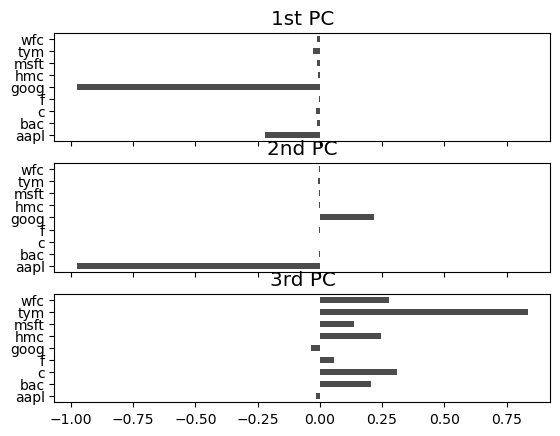

In [229]:
from pandas import Series

import matplotlib.pyplot as plt

aatrib = list(newdata)

#pcdata = Series()

fix,axes = plt.subplots(3,1,sharex=True)

pcdata = Series(pca.components_[0,],index=aatrib)

pcdata.plot(kind = 'barh',ax = axes[0],color='k',alpha=.7)

axes[0].set_title(r'1st PC',size = 'x-large')

pcdata = Series(pca.components_[1,],index=aatrib)

pcdata.plot(kind = 'barh',ax = axes[1],color='k',alpha=.7)

axes[1].set_title(r'2nd PC',size = 'x-large')

pcdata = Series(pca.components_[2,],index=aatrib)

pcdata.plot(kind = 'barh',ax = axes[2],color='k',alpha=.7)

axes[2].set_title(r'3rd PC',size = 'x-large')


In [222]:
pca.components_[0,]

array([-0.21861254, -0.00968559, -0.0155541 , -0.00380567, -0.97506698,
       -0.00935095, -0.01283292, -0.02587315, -0.01345981])